<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/ProyectoFinal-FlexSim-EvectosDiscretos/Proyecto_Final_Remesas_Cuenca_Azuay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flujo de Remesas en el Ecuador

Como primer punto tenemos el estudio de las remesas dentro de Cuenca – Ecuador. Dentro del Banco central del ecuador tenemos información de las remesas enviadas y recibidas. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Simulacion/Segundo-Interciclo/Proyecto-Final-Remesas-Cuenca-Azuay
!ls

/content/drive/My Drive/Simulacion/Segundo-Interciclo/Proyecto-Final-Remesas-Cuenca-Azuay
Azuay-Cuenca-Envidas-Remesas.csv    Proyecto-Final-Remesas-Cuenca-Azuay.ipynb
Azuay-Cuenca-Recibidas-Remesas.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go
import pandas as pd


### Remesas Recibidas

In [ ]:
datasetRecibidas = pd.read_csv('Azuay-Cuenca-Recibidas-Remesas.csv', low_memory=False, sep=';')
print("Dimensión del dataframe: ",datasetRecibidas.shape)
datasetRecibidas.head()

Dimensión del dataframe:  (60, 3)


,Trimestre,Dinero-AZUAY-RECIBIDAS,Dinero-CUENCA-RECIBIDAS
0,2007.I,"145.485,60","98.532,40"
1,2007.II,"156.836,60","95.778,30"
2,2007.III,"157.642,80","99.486,20"
3,2007.IV,"137.293,50","77.899,10"
4,2008.I,"123.561,00","87.280,10"


In [ ]:
datasetRecibidas['Dinero-CUENCA-RECIBIDAS'] = datasetRecibidas['Dinero-CUENCA-RECIBIDAS'].apply(lambda x: x.replace('.',''))
datasetRecibidas['Dinero-CUENCA-RECIBIDAS'] = datasetRecibidas['Dinero-CUENCA-RECIBIDAS'].apply(lambda x: x.replace(',','.'))
datasetRecibidas['Dinero-CUENCA-RECIBIDAS'] = pd.to_numeric(datasetRecibidas['Dinero-CUENCA-RECIBIDAS'])

datasetRecibidas['Dinero-AZUAY-RECIBIDAS'] = datasetRecibidas['Dinero-AZUAY-RECIBIDAS'].apply(lambda x: x.replace('.',''))
datasetRecibidas['Dinero-AZUAY-RECIBIDAS'] = datasetRecibidas['Dinero-AZUAY-RECIBIDAS'].apply(lambda x: x.replace(',','.'))
datasetRecibidas['Dinero-AZUAY-RECIBIDAS'] = pd.to_numeric(datasetRecibidas['Dinero-AZUAY-RECIBIDAS'])
datasetRecibidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trimestre                60 non-null     object 
 1   Dinero-AZUAY-RECIBIDAS   60 non-null     float64
 2   Dinero-CUENCA-RECIBIDAS  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
#Accedemos a la única columna que tenemos
datasetRecibidas2 = datasetRecibidas
fecha = datasetRecibidas['Trimestre'].str.split(".", expand=True)
fecha.columns = ['year', 'periodo']
datasetRecibidas= pd.concat([datasetRecibidas, fecha], axis=1)
datasetRecibidas.head(5)

,Trimestre,Dinero-AZUAY-RECIBIDAS,Dinero-CUENCA-RECIBIDAS,year,periodo
0,2007.I,145485.6,98532.4,2007,I
1,2007.II,156836.6,95778.3,2007,II
2,2007.III,157642.8,99486.2,2007,III
3,2007.IV,137293.5,77899.1,2007,IV
4,2008.I,123561.0,87280.1,2008,I


In [ ]:
datasetRecibidas['MesInicio'] = datasetRecibidas['periodo'].map({'I':'Enero',
                             'II':'Abril',
                             'III':'Julio',
                             'IV':'Octubre'})

datasetRecibidas['MesInicioNumero'] = datasetRecibidas['periodo'].map({'I':'1',
                             'II':'4',
                             'III':'7',
                             'IV':'10'})

datasetRecibidas['DiaInicio'] = datasetRecibidas['periodo'].map({'I':'1',
                             'II':'1',
                             'III':'1',
                             'IV':'1'})

datasetRecibidas['MesFin'] = datasetRecibidas['periodo'].map({'I':'Marzo',
                             'II':'Junio',
                             'III':'Septiembre',
                             'IV':'Diciembre'})

datasetRecibidas['MesFinNumero'] = datasetRecibidas['periodo'].map({'I':'3',
                             'II':'6',
                             'III':'9',
                             'IV':'12'})

datasetRecibidas['DiaFin'] = datasetRecibidas['periodo'].map({'I':'31',
                             'II':'30',
                             'III':'30',
                             'IV':'31'})


In [ ]:
datasetRecibidas['fechaInicio'] = datasetRecibidas[['year', 'MesInicioNumero', 'DiaInicio']].apply(lambda x: '/'.join(x.astype('str')), axis=1)
datasetRecibidas['fechaFin'] = datasetRecibidas[['year', 'MesFinNumero', 'DiaFin']].apply(lambda x: '/'.join(x.astype('str')), axis=1)

In [ ]:
datasetRecibidas.head(8)

,Trimestre,Dinero-AZUAY-RECIBIDAS,Dinero-CUENCA-RECIBIDAS,year,periodo,MesInicio,MesInicioNumero,DiaInicio,MesFin,MesFinNumero,DiaFin,fechaInicio,fechaFin
0,2007.I,145485.6,98532.4,2007,I,Enero,1,1,Marzo,3,31,2007-01-01,2007-03-31
1,2007.II,156836.6,95778.3,2007,II,Abril,4,1,Junio,6,30,2007-04-01,2007-06-30
2,2007.III,157642.8,99486.2,2007,III,Julio,7,1,Septiembre,9,30,2007-07-01,2007-09-30
3,2007.IV,137293.5,77899.1,2007,IV,Octubre,10,1,Diciembre,12,31,2007-10-01,2007-12-31
4,2008.I,123561.0,87280.1,2008,I,Enero,1,1,Marzo,3,31,2008-01-01,2008-03-31
5,2008.II,131162.8,95913.3,2008,II,Abril,4,1,Junio,6,30,2008-04-01,2008-06-30
6,2008.III,119221.8,82767.0,2008,III,Julio,7,1,Septiembre,9,30,2008-07-01,2008-09-30
7,2008.IV,117269.5,88695.2,2008,IV,Octubre,10,1,Diciembre,12,31,2008-10-01,2008-12-31


In [ ]:
datasetRecibidas['fechaInicio'] = pd.to_datetime(datasetRecibidas['fechaInicio'], format='%Y/%m/%d')
datasetRecibidas['fechaFin'] = pd.to_datetime(datasetRecibidas['fechaFin'], format='%Y/%m/%d')

In [ ]:
datasetRecibidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Trimestre                60 non-null     object        
 1   Dinero-AZUAY-RECIBIDAS   60 non-null     float64       
 2   Dinero-CUENCA-RECIBIDAS  60 non-null     float64       
 3   year                     60 non-null     object        
 4   periodo                  60 non-null     object        
 5   MesInicio                60 non-null     object        
 6   MesInicioNumero          60 non-null     object        
 7   DiaInicio                60 non-null     object        
 8   MesFin                   60 non-null     object        
 9   MesFinNumero             60 non-null     object        
 10  DiaFin                   60 non-null     object        
 11  fechaInicio              60 non-null     datetime64[ns]
 12  fechaFin                 60 non-null  

### Remesas Enviadas

In [ ]:
datasetEnviadas = pd.read_csv('Azuay-Cuenca-Envidas-Remesas.csv', low_memory=False, sep=';')
print("Dimensión del dataframe: ",datasetEnviadas.shape)
datasetEnviadas.head(50)

Dimensión del dataframe:  (49, 3)


,Trimestre,Dinero-AZUAY-ENVIADAS,Dinero-CUENCA-ENVIADAS
0,2009.IV,"1.494,37","1.370,99"
1,2010.I,"1.907,28","1.626,78"
2,2010.II,"2.017,62","1.708,44"
3,2010.III,"2.224,93","1.930,57"
4,2010.IV,"1.750,28","1.481,13"
5,2011.I,"2.090,41","1.787,08"
6,2011.II,"2.773,81","2.385,12"
7,2011.III,"2.245,31","1.854,48"
8,2011.IV,"2.899,32","2.484,38"
9,2012.I,"2.617,10","2.225,52"


In [ ]:
datasetEnviadas['Dinero-CUENCA-ENVIADAS'] = datasetEnviadas['Dinero-CUENCA-ENVIADAS'].apply(lambda x: x.replace('.',''))
datasetEnviadas['Dinero-CUENCA-ENVIADAS'] = datasetEnviadas['Dinero-CUENCA-ENVIADAS'].apply(lambda x: x.replace(',','.'))
datasetEnviadas['Dinero-CUENCA-ENVIADAS'] = pd.to_numeric(datasetEnviadas['Dinero-CUENCA-ENVIADAS'])

datasetEnviadas['Dinero-AZUAY-ENVIADAS'] = datasetEnviadas['Dinero-AZUAY-ENVIADAS'].apply(lambda x: x.replace('.',''))
datasetEnviadas['Dinero-AZUAY-ENVIADAS'] = datasetEnviadas['Dinero-AZUAY-ENVIADAS'].apply(lambda x: x.replace(',','.'))
datasetEnviadas['Dinero-AZUAY-ENVIADAS'] = pd.to_numeric(datasetEnviadas['Dinero-AZUAY-ENVIADAS'])
datasetEnviadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trimestre               49 non-null     object 
 1   Dinero-AZUAY-ENVIADAS   49 non-null     float64
 2   Dinero-CUENCA-ENVIADAS  49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
#Accedemos a la única columna que tenemos
fecha = datasetEnviadas['Trimestre'].str.split(".", expand=True)
fecha.columns = ['year', 'periodo']
datasetEnviadas= pd.concat([datasetEnviadas, fecha], axis=1)
datasetEnviadas.head(5)

,Trimestre,Dinero-AZUAY-ENVIADAS,Dinero-CUENCA-ENVIADAS,year,periodo
0,2009.IV,1494.37,1370.99,2009,IV
1,2010.I,1907.28,1626.78,2010,I
2,2010.II,2017.62,1708.44,2010,II
3,2010.III,2224.93,1930.57,2010,III
4,2010.IV,1750.28,1481.13,2010,IV


In [ ]:
datasetEnviadas['MesInicio'] = datasetEnviadas['periodo'].map({'I':'Enero',
                             'II':'Abril',
                             'III':'Julio',
                             'IV':'Octubre'})

datasetEnviadas['MesInicioNumero'] = datasetEnviadas['periodo'].map({'I':'1',
                             'II':'4',
                             'III':'7',
                             'IV':'10'})

datasetEnviadas['DiaInicio'] = datasetEnviadas['periodo'].map({'I':'1',
                             'II':'1',
                             'III':'1',
                             'IV':'1'})

datasetEnviadas['MesFin'] = datasetEnviadas['periodo'].map({'I':'Marzo',
                             'II':'Junio',
                             'III':'Septiembre',
                             'IV':'Diciembre'})

datasetEnviadas['MesFinNumero'] = datasetEnviadas['periodo'].map({'I':'3',
                             'II':'6',
                             'III':'9',
                             'IV':'12'})

datasetEnviadas['DiaFin'] = datasetEnviadas['periodo'].map({'I':'31',
                             'II':'30',
                             'III':'30',
                             'IV':'31'})


In [ ]:
datasetEnviadas['fechaInicio'] = datasetEnviadas[['year', 'MesInicioNumero', 'DiaInicio']].apply(lambda x: '/'.join(x.astype('str')), axis=1)
datasetEnviadas['fechaFin'] = datasetEnviadas[['year', 'MesFinNumero', 'DiaFin']].apply(lambda x: '/'.join(x.astype('str')), axis=1)

In [ ]:
datasetEnviadas.head(8)

,Trimestre,Dinero-AZUAY-ENVIADAS,Dinero-CUENCA-ENVIADAS,year,periodo,MesInicio,MesInicioNumero,DiaInicio,MesFin,MesFinNumero,DiaFin,fechaInicio,fechaFin
0,2009.IV,1494.37,1370.99,2009,IV,Octubre,10,1,Diciembre,12,31,2009/10/1,2009/12/31
1,2010.I,1907.28,1626.78,2010,I,Enero,1,1,Marzo,3,31,2010/1/1,2010/3/31
2,2010.II,2017.62,1708.44,2010,II,Abril,4,1,Junio,6,30,2010/4/1,2010/6/30
3,2010.III,2224.93,1930.57,2010,III,Julio,7,1,Septiembre,9,30,2010/7/1,2010/9/30
4,2010.IV,1750.28,1481.13,2010,IV,Octubre,10,1,Diciembre,12,31,2010/10/1,2010/12/31
5,2011.I,2090.41,1787.08,2011,I,Enero,1,1,Marzo,3,31,2011/1/1,2011/3/31
6,2011.II,2773.81,2385.12,2011,II,Abril,4,1,Junio,6,30,2011/4/1,2011/6/30
7,2011.III,2245.31,1854.48,2011,III,Julio,7,1,Septiembre,9,30,2011/7/1,2011/9/30


In [ ]:
datasetEnviadas['fechaInicio'] = pd.to_datetime(datasetEnviadas['fechaInicio'], format='%Y/%m/%d')
datasetEnviadas['fechaFin'] = pd.to_datetime(datasetEnviadas['fechaFin'], format='%Y/%m/%d')

In [ ]:
datasetEnviadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Trimestre               49 non-null     object        
 1   Dinero-AZUAY-ENVIADAS   49 non-null     float64       
 2   Dinero-CUENCA-ENVIADAS  49 non-null     float64       
 3   year                    49 non-null     object        
 4   periodo                 49 non-null     object        
 5   MesInicio               49 non-null     object        
 6   MesInicioNumero         49 non-null     object        
 7   DiaInicio               49 non-null     object        
 8   MesFin                  49 non-null     object        
 9   MesFinNumero            49 non-null     object        
 10  DiaFin                  49 non-null     object        
 11  fechaInicio             49 non-null     datetime64[ns]
 12  fechaFin                49 non-null     datetime64[n

### Diagrama de dispersión

#### Diagrma para recibo de remesas

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Dinero-CUENCA-RECIBIDAS
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


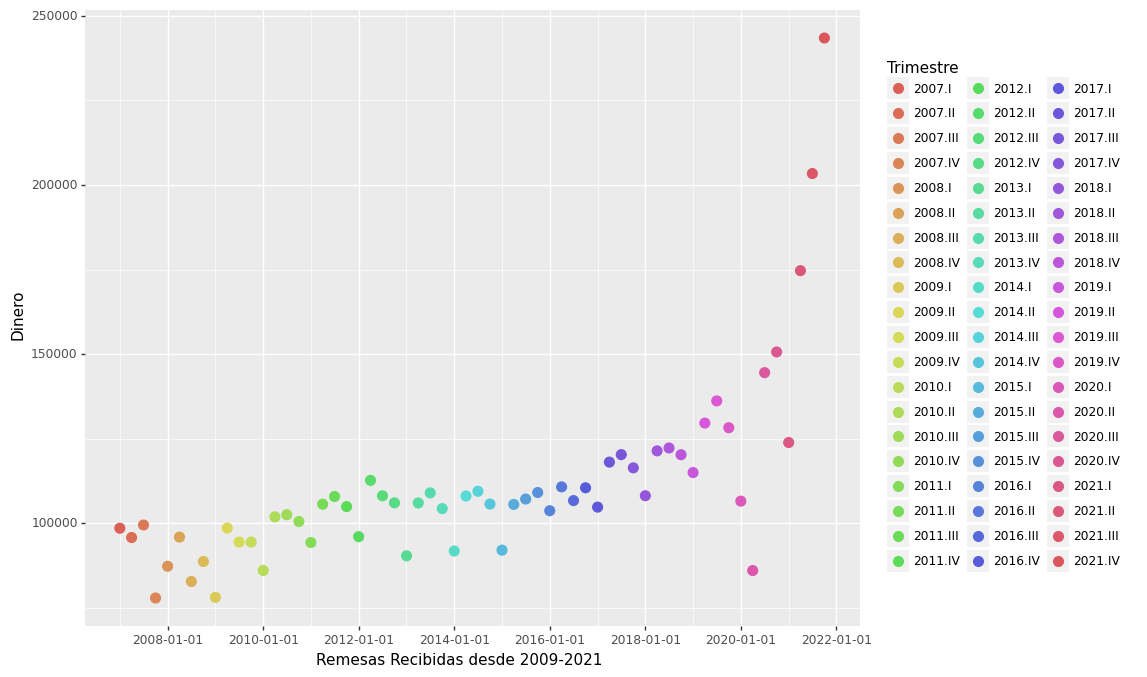

<ggplot: (8733299019361)>

In [ ]:
from plotnine import *
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_point, theme
import plotly.graph_objects as go

enviadasRemesas = (
    ggplot(datasetRecibidas)
    + aes(x = "fechaInicio", y = "Dinero-CUENCA-RECIBIDAS", color="Trimestre")
    + labs(y="Dinero", x='Remesas Recibidas desde 2009-2021')
    + geom_point(size=3.5)
)   + theme(figure_size=(10, 8))
enviadasRemesas.save("Dinero-CUENCA-RECIBIDAS", dpi=600)
enviadasRemesas

In [ ]:
from plotnine import *
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_point, theme
import plotly.graph_objects as go

enviadasRemesas = (
    ggplot(datasetRecibidas)
    + aes(x = "Trimestre", y = "Dinero-AZUAY-RECIBIDAS", color="Trimestre")
    + labs(y="Dinero", x='Remesas Recibidas desde 2009-2021')
    + geom_point(size=3.5)
    + scale_y_discrete(labels = datasetRecibidas["Dinero-AZUAY-RECIBIDAS"])
)   + theme(axis_text_x = element_blank(),  axis_ticks = element_blank(), figure_size=(6, 13))
enviadasRemesas.save("Dinero-AZUAY-RECIBIDAS", dpi=600)

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 13 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Dinero-AZUAY-RECIBIDAS
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


#### Diagrama para envio de remesas

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Dinero-CUENCA-ENVIADA.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


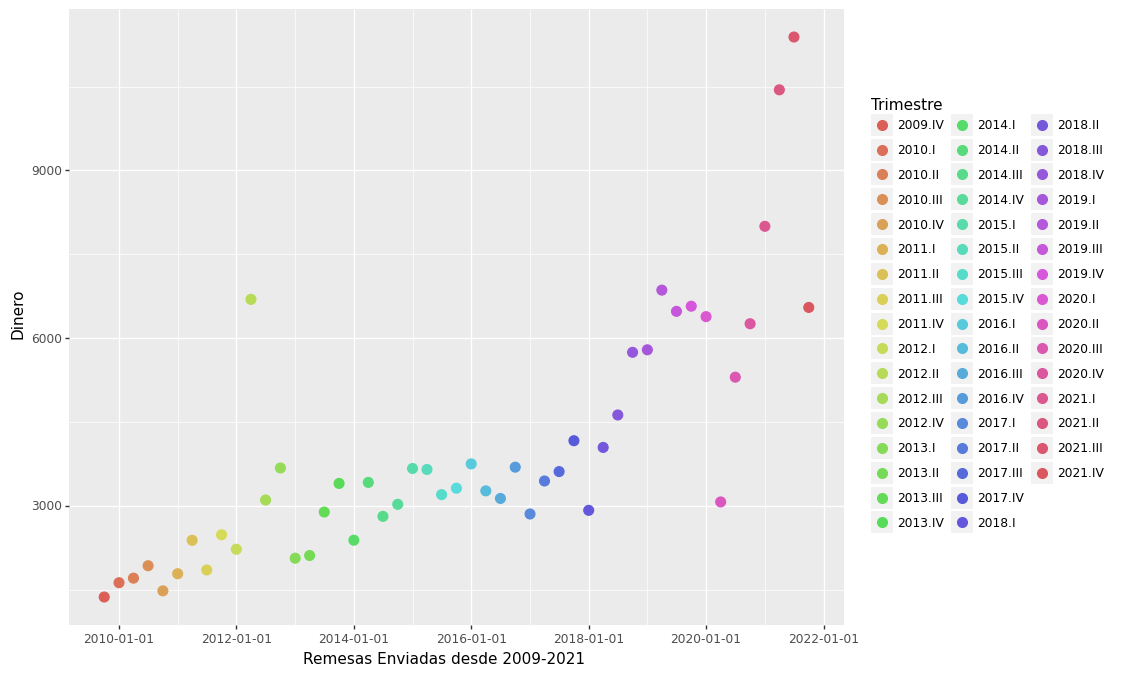

<ggplot: (8733298289369)>

In [ ]:
from plotnine import *
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_point, theme
import plotly.graph_objects as go


enviadasRemesas = (
    ggplot(datasetEnviadas)
    + aes(x = "fechaInicio", y = "Dinero-CUENCA-ENVIADAS", color="Trimestre")
    + labs(y="Dinero", x='Remesas Enviadas desde 2009-2021')
    + geom_point(size=3.5)
)   + theme(figure_size=(10, 8))
enviadasRemesas.save("Dinero-CUENCA-ENVIADA.png", dpi=600)
enviadasRemesas



In [ ]:
from plotnine import *
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_point, theme
import plotly.graph_objects as go

enviadasRemesas = (
    ggplot(datasetEnviadas)
    + aes(x = "periodo", y = "Dinero-AZUAY-ENVIADAS", color="Trimestre")
    + labs(y="Dinero", x='Remesas Enviadas desde 2009-2021')
    + geom_point(size=3.5)
    + scale_y_discrete(labels = datasetEnviadas["Dinero-AZUAY-ENVIADAS"])
)   + theme(figure_size=(6, 13))
enviadasRemesas.save("Dinero-AZUAY-ENVIADAS.png", dpi=600)

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 13 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Dinero-AZUAY-ENVIADAS.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


### Regresión Lineal 


### Para recibo de remesas en la ciudad de Cuenca

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import datetime
datasetRecibidas['conv_date'] = datasetRecibidas['fechaInicio'].map(datetime.datetime.toordinal)
datasetRecibidas.head(8)

,Trimestre,Dinero-AZUAY-RECIBIDAS,Dinero-CUENCA-RECIBIDAS,year,periodo,MesInicio,MesInicioNumero,DiaInicio,MesFin,MesFinNumero,DiaFin,fechaInicio,fechaFin,conv_date
0,2007.I,145485.6,98532.4,2007,I,Enero,1,1,Marzo,3,31,2007-01-01,2007-03-31,732677
1,2007.II,156836.6,95778.3,2007,II,Abril,4,1,Junio,6,30,2007-04-01,2007-06-30,732767
2,2007.III,157642.8,99486.2,2007,III,Julio,7,1,Septiembre,9,30,2007-07-01,2007-09-30,732858
3,2007.IV,137293.5,77899.1,2007,IV,Octubre,10,1,Diciembre,12,31,2007-10-01,2007-12-31,732950
4,2008.I,123561.0,87280.1,2008,I,Enero,1,1,Marzo,3,31,2008-01-01,2008-03-31,733042
5,2008.II,131162.8,95913.3,2008,II,Abril,4,1,Junio,6,30,2008-04-01,2008-06-30,733133
6,2008.III,119221.8,82767.0,2008,III,Julio,7,1,Septiembre,9,30,2008-07-01,2008-09-30,733224
7,2008.IV,117269.5,88695.2,2008,IV,Octubre,10,1,Diciembre,12,31,2008-10-01,2008-12-31,733316


In [ ]:
X = datasetRecibidas[['conv_date']]
y = datasetRecibidas['Dinero-CUENCA-RECIBIDAS']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                        )
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())                                


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     33.69
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           5.68e-07
Time:                        01:29:03   Log-Likelihood:                -548.05
No. Observations:                  48   AIC:                             1100.
Df Residuals:                      46   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.433e+06   1.47e+06     -5.729      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,84496.446185,5693.563931,73035.896426,95956.995944,37836.176260,131156.716110
1,101472.088634,3687.646274,94049.241692,108894.935577,55636.128456,147308.048812
2,129044.436020,4414.975144,120157.552000,137931.320041,82948.738865,175140.133176
3,108896.753607,3278.044920,102298.391426,115495.115788,63187.072224,154606.434990


In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

In [ ]:
datasetRecibidas['conv_date'] = datasetRecibidas['fechaInicio'].map(datetime.datetime.toordinal)


In [ ]:
predicciones['x_conv'] = predicciones['x'].astype(int).map(datetime.datetime.fromordinal)

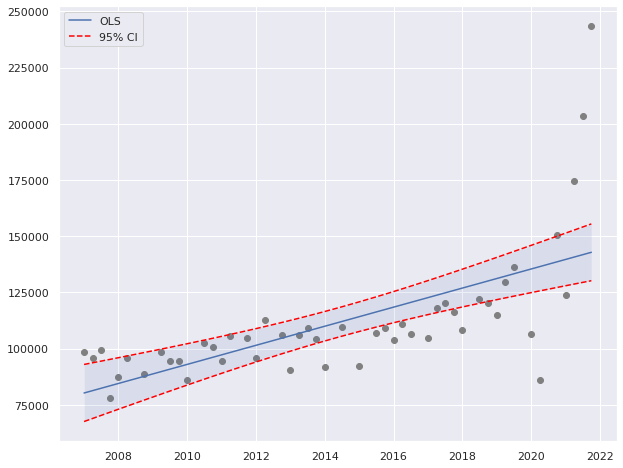

In [ ]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(predicciones['x_conv'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x_conv'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x_conv'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x_conv'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x_conv'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();
fig.savefig('PrediccionRemesasRecebidas.png', dpi=300, bbox_inches='tight')


In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 7615.980480262221


#### Predicción de Envio de remesas para los siguientes trimestres

- 01 de Enero de 2022
- 01 de Abril de 2022
- 01 de Julio de 2022


In [ ]:
# importing datetime module for today()
import datetime
trimestreNow = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d").toordinal()
trimestreNow1 = datetime.datetime.strptime("2022-04-01", "%Y-%m-%d").toordinal()
trimestreNow2= datetime.datetime.strptime("2022-07-01", "%Y-%m-%d").toordinal()
print(trimestreNow)

prediccion= pd.DataFrame([trimestreNow, trimestreNow1, trimestreNow2], columns=['conv_date'])
prediccion = prediccion.values.reshape(-1,1)
prediccion = sm.add_constant(prediccion)

preccionNuevasFechas =  modelo.predict(prediccion) # predict out of sample
preccionNuevasFechas

738156


array([143917.00435354, 144962.73181446, 146020.07846939])

#### Resultados de predicción para Envio de remesas: 

- 01 de Enero de 2022: 143917
- 01 de Abril de 2022: 144962.73
- 01 de Julio de 2022: 146020.07

### Para envio de remesas en la ciudad de Cuenca

In [ ]:
datasetEnviadas['conv_date'] = datasetEnviadas['fechaInicio'].map(datetime.datetime.toordinal)
datasetEnviadas.head(8)

,Trimestre,Dinero-AZUAY-ENVIADAS,Dinero-CUENCA-ENVIADAS,year,periodo,MesInicio,MesInicioNumero,DiaInicio,MesFin,MesFinNumero,DiaFin,fechaInicio,fechaFin,conv_date
0,2009.IV,1494.37,1370.99,2009,IV,Octubre,10,1,Diciembre,12,31,2009-10-01,2009-12-31,733681
1,2010.I,1907.28,1626.78,2010,I,Enero,1,1,Marzo,3,31,2010-01-01,2010-03-31,733773
2,2010.II,2017.62,1708.44,2010,II,Abril,4,1,Junio,6,30,2010-04-01,2010-06-30,733863
3,2010.III,2224.93,1930.57,2010,III,Julio,7,1,Septiembre,9,30,2010-07-01,2010-09-30,733954
4,2010.IV,1750.28,1481.13,2010,IV,Octubre,10,1,Diciembre,12,31,2010-10-01,2010-12-31,734046
5,2011.I,2090.41,1787.08,2011,I,Enero,1,1,Marzo,3,31,2011-01-01,2011-03-31,734138
6,2011.II,2773.81,2385.12,2011,II,Abril,4,1,Junio,6,30,2011-04-01,2011-06-30,734228
7,2011.III,2245.31,1854.48,2011,III,Julio,7,1,Septiembre,9,30,2011-07-01,2011-09-30,734319


In [ ]:
X = datasetEnviadas[['conv_date']]
y = datasetEnviadas['Dinero-CUENCA-ENVIADAS']
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                        )
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
#print("**************************", X_train)
X_train = sm.add_constant(X_train, prepend=True)
#print("**************************", X_train)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())                                

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     62.79
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.73e-09
Time:                        01:07:25   Log-Likelihood:                -337.48
No. Observations:                  39   AIC:                             679.0
Df Residuals:                      37   BIC:                             682.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.045e+06   1.32e+05     -7.892      0.0

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5771.337010,304.359086,5154.646924,6388.027095,2822.274436,8720.399583
1,6682.057788,390.146337,5891.546220,7472.569355,3691.811654,9672.303921
2,3299.991424,253.138381,2787.084345,3812.898504,370.872603,6229.110246
3,2387.845418,320.458622,1738.534574,3037.156263,-568.210733,5343.901570


In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

In [ ]:
datasetEnviadas['conv_date'] = datasetEnviadas['fechaInicio'].map(datetime.datetime.toordinal)
predicciones['x_conv'] = predicciones['x'].astype(int).map(datetime.datetime.fromordinal)

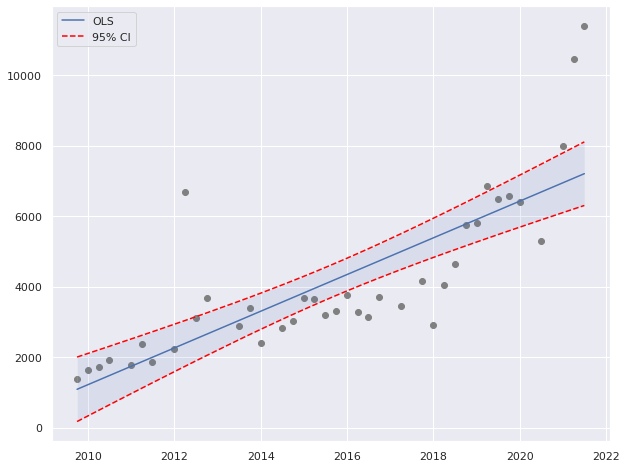

In [ ]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(predicciones['x_conv'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x_conv'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x_conv'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x_conv'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x_conv'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();
fig.savefig('PrediccionRemesasEnviadas.png', dpi=300, bbox_inches='tight')


In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1435.9684654849575


#### Predicción de Envio de remesas para los siguientes trimestres

- 01 de Enero de 2022
- 01 de Abril de 2022
- 01 de Julio de 2022


In [ ]:
# importing datetime module for today()
import datetime
trimestreNow = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d").toordinal()
trimestreNow1 = datetime.datetime.strptime("2022-04-01", "%Y-%m-%d").toordinal()
trimestreNow2= datetime.datetime.strptime("2022-07-01", "%Y-%m-%d").toordinal()
print(trimestreNow)

738156


In [ ]:
prediccion= pd.DataFrame([trimestreNow, trimestreNow1, trimestreNow2], columns=['conv_date'])
prediccion = prediccion.values.reshape(-1,1)
prediccion = sm.add_constant(prediccion)

In [ ]:
preccionNuevasFechas =  modelo.predict(prediccion) # predict out of sample
preccionNuevasFechas

array([7464.50803354, 7592.77856565, 7722.4743259 ])

#### Resultados de predicción para Envio de remesas: 

- 01 de Enero de 2022: 7464.51
- 01 de Abril de 2022: 7592.78
- 01 de Julio de 2022: 7722.47
